<a href="https://colab.research.google.com/github/piyushbg/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

 The purpose of this project is to investigate the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a major Indian bank. The project used a dataset of Yes Bank's monthly stock prices since its inception, including closing, opening, highest, and lowest stock prices.

Three models were developed to predict the stock's closing price: Ridge regression, Random Forest, and XGBoost Regressor. The model was trained on historical stock price data and features such as the mean of Open, High, and Low features. Additional features were created by taking lags to capture temporal trends and patterns in the data. The model's performance was evaluated using metrics such as RMSE (Root Mean Squared Error), adjusted R2, and R2 score. The XGBoost regressor performed the best of the three with high R2 score and adjusted R2.

The goal of the analysis was to uncover any patterns or changes in stock prices related to the fraud case involving Rana Kapoor. The feature importance provided by the XGBoost model helped identify the key factors influencing the stock price.

Overall, the project aimed to improve understanding of the relationship between the fraud case and Yes Bank's stock prices and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be used by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.



# **GitHub Link -**https://github.com/piyushbg/Yes-Bank-Stock-Closing-Price-Prediction

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. In 2018, it was involved in a fraud case that made headlines. This dataset has monthly stock prices of the bank since its inception, including closing, opening, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

A stock is a financial instrument that represents ownership in a company. Stocks are bought and sold on stock exchanges, and are the foundation of many individual investors' portfolios.

The business objective is to use a regression model to accurately predict the closing price of Yes Bank stock. This would allow stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, and align investment strategies with financial goals.

The steps involved in the project are:









1.   Data preprocessing

2.  Data cleaning

3.  Data duplication
4.
Handling outliers


5.   Feature transformation


6.   Exploratory data analysis

7.   Encoding of categorical columns

8.  Algorithm selection








# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
dataset



,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [7]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
dataset.size


925

In [9]:
dataset.shape

(185, 5)

### Dataset Information

In [10]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [13]:
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [14]:
# Visualizing the missing values


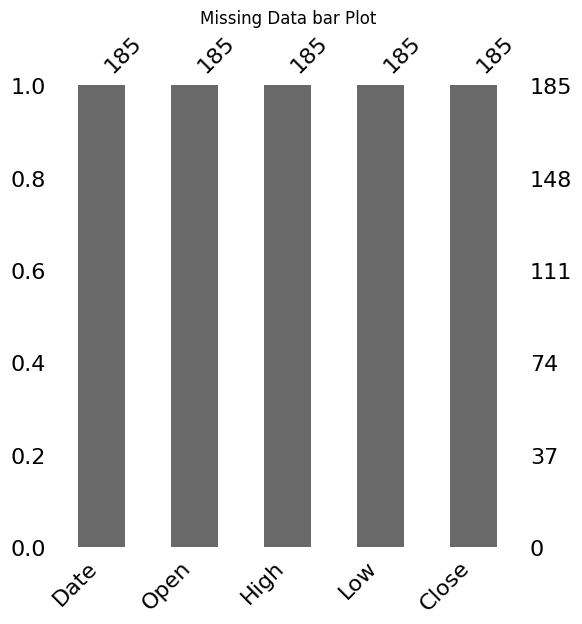

In [15]:
# Visualizing the missing values
import missingno as msno


msno.bar(dataset,figsize=(6,6))


plt.title('Missing Data bar Plot')
plt.show()



### What did you know about your dataset?

The dataset contains 5 columns and 185 records of monthly stock prices from July 2005 to November 2020. The 4 independent variables are Date, Open, High, and Low, while the dependent variable is Close. There are no duplicate values, null values, or missing values in the data. The independent variables are all of float data type, except Date which is of object data type and needs to be converted to datetime.



1.  Date: The date of the stock price.
2.   
Open: The opening price of the stock on that date.

3.  High: The highest price of the stock on that date.
4.   Low: The lowest price of the stock on that date.

5. Close: The closing price of the stock on that date.











## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [17]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November
2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('unique values in ',i, 'are', dataset[i].nunique())


unique values in  Date are 185
unique values in  Open are 183
unique values in  High are 184
unique values in  Low are 183
unique values in  Close are 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
dataset_copy= dataset.copy()

In [20]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [21]:
dataset_copy.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [22]:
len(dataset_copy[dataset_copy.duplicated()])

0

In [23]:
#converting datatype of Date from string to Datetime

from datetime import datetime

dataset_copy['Date']=pd.to_datetime(dataset_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [24]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [25]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [26]:
dataset_copy.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [27]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]
numerical_cols


['Open', 'High', 'Low', 'Close']

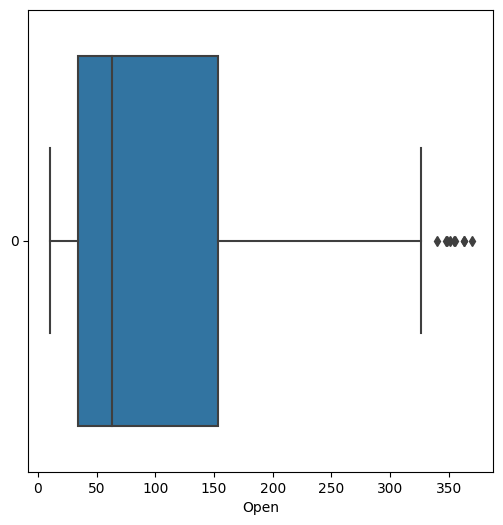

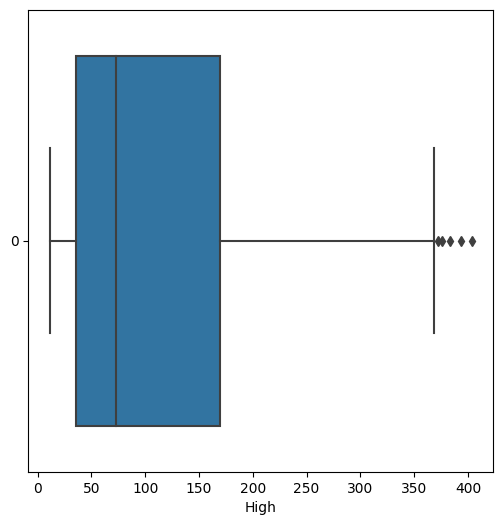

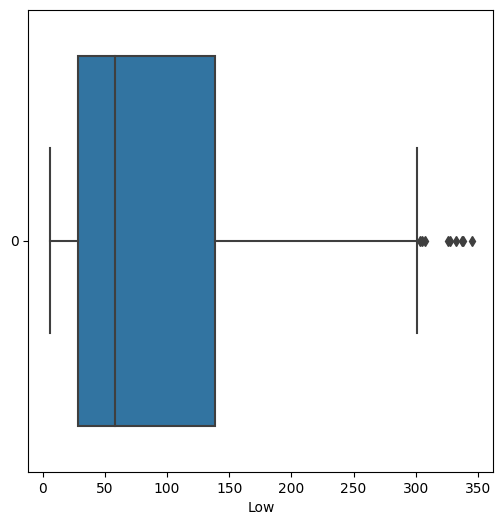

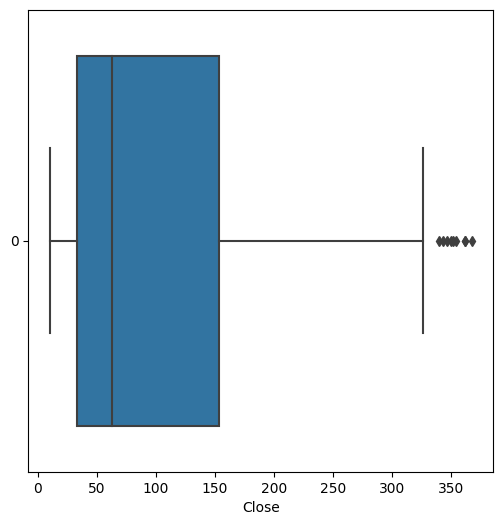

In [28]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [29]:
dataset_copy.set_index('Date', inplace=True)

In [30]:
dataset_copy.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [31]:
independent_variables = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

The Date variable has been changed to datetime data type. The remaining variables are numerical, and include Open, High, Low, and Close (the dependent variable). There are no null values or duplicate values in the dataset. The data is clean and ready for visualization. The mean of the numerical columns is higher, which suggests that the data may be skewed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

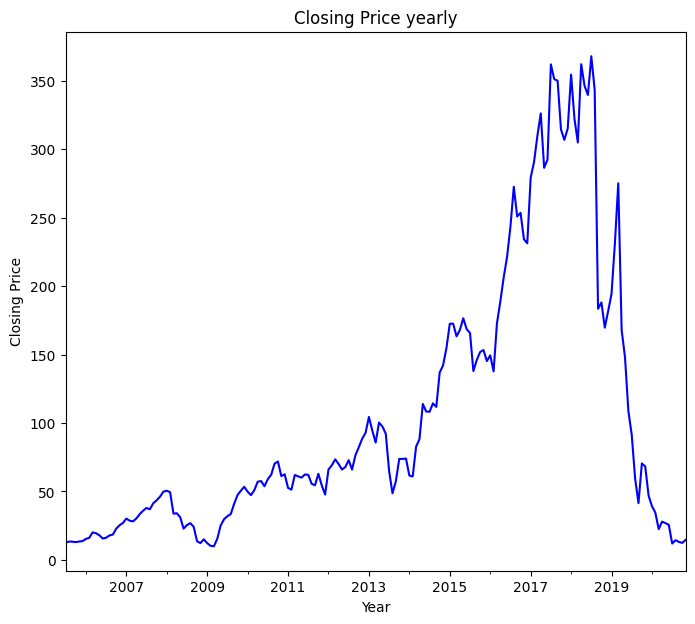

In [32]:
# Chart - 1 visualization code
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

To check how closing price trends  each year.

##### 2. What is/are the insight(s) found from the chart?

By seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2

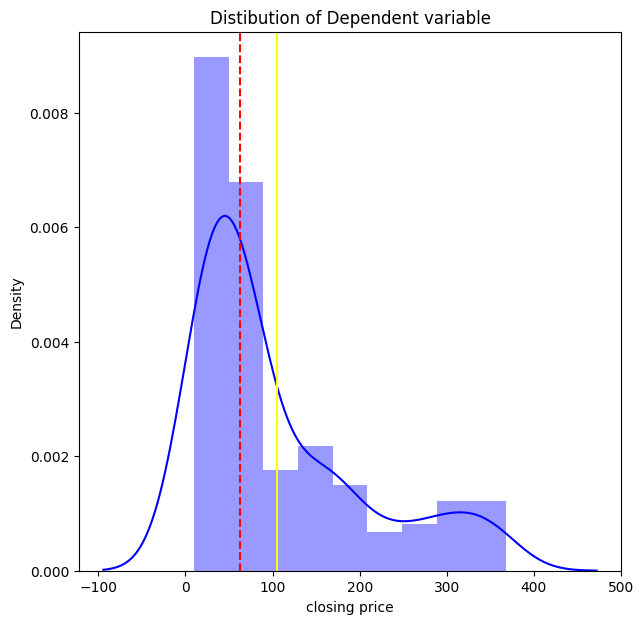

In [33]:
# Chart - 2 visualization code

#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color='yellow')
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3

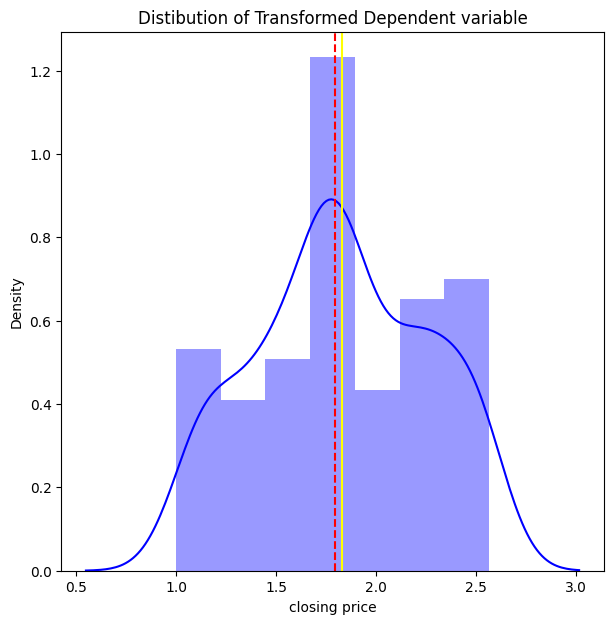

In [34]:
# Chart - 3 visualization code
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(dataset_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(dataset_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

to see the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution.
mean and median are almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4

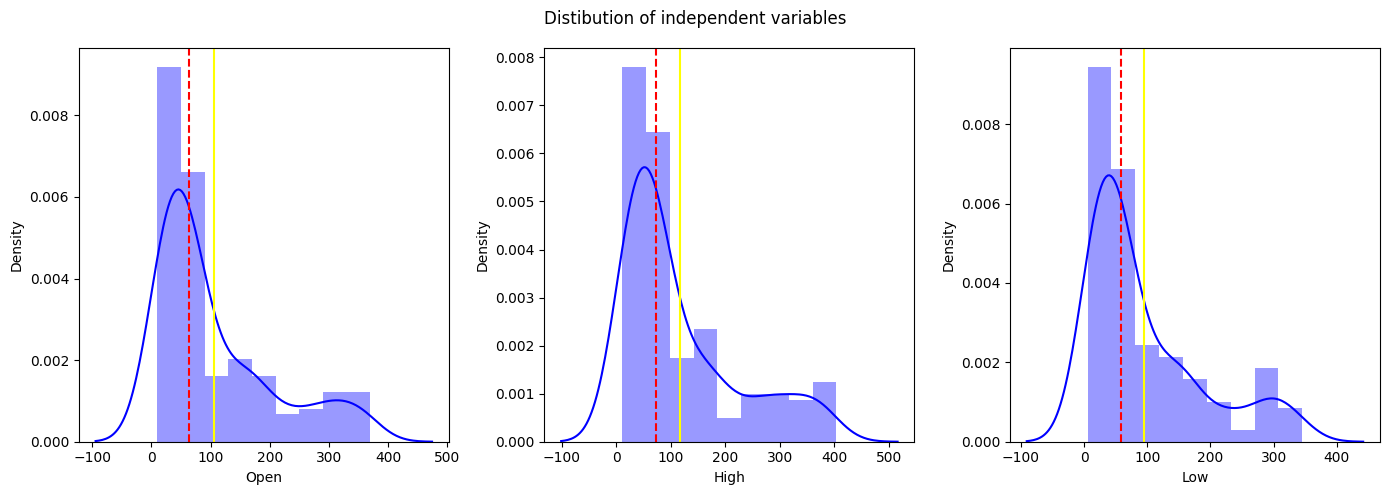

In [35]:
# Chart - 4 visualization code

# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset_copy[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(dataset_copy[col].mean(), color='yellow')
    plt.axvline(dataset_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5

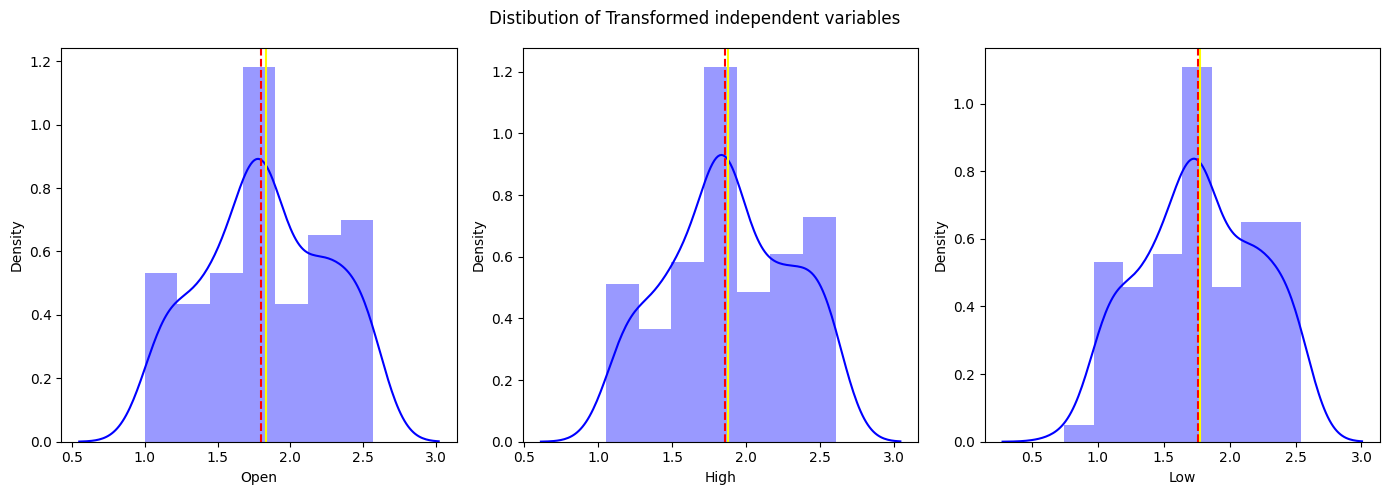

In [36]:
# Chart - 5 visualization code
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot( 1, 3,i+1)
    sns.distplot(np.log10(dataset_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(dataset_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(dataset_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


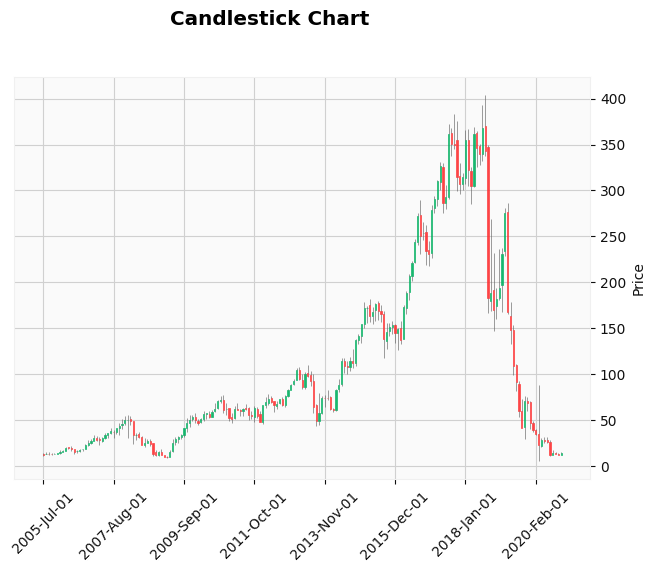

In [37]:
# Chart - 6 visualization code
!pip install mplfinance

import mplfinance as mpf

df_candle = dataset_copy[['Open', 'High', 'Low', 'Close']]

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

##### 1. Why did you pick the specific chart?

candle sticks are most widely used finance world. with this chart I want to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

from the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 7

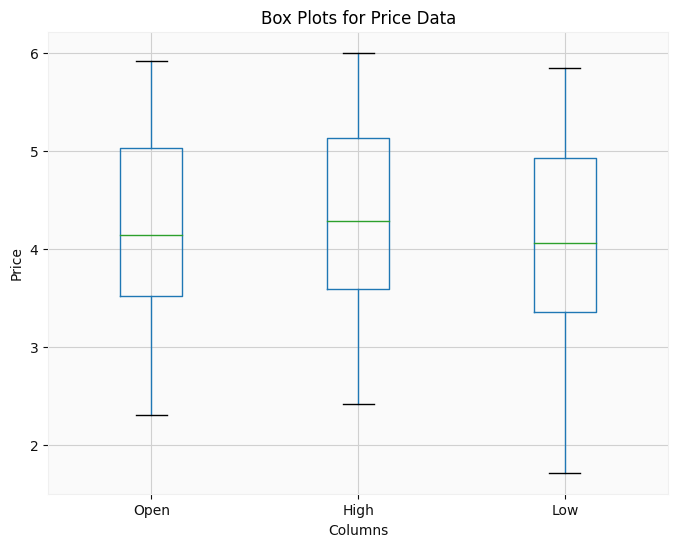

In [38]:
# Chart - 7 visualization code
df_price = np.log(dataset_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

TO see outliers exists or not in the independent variables.

##### 2. What is/are the insight(s) found from the chart?

After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

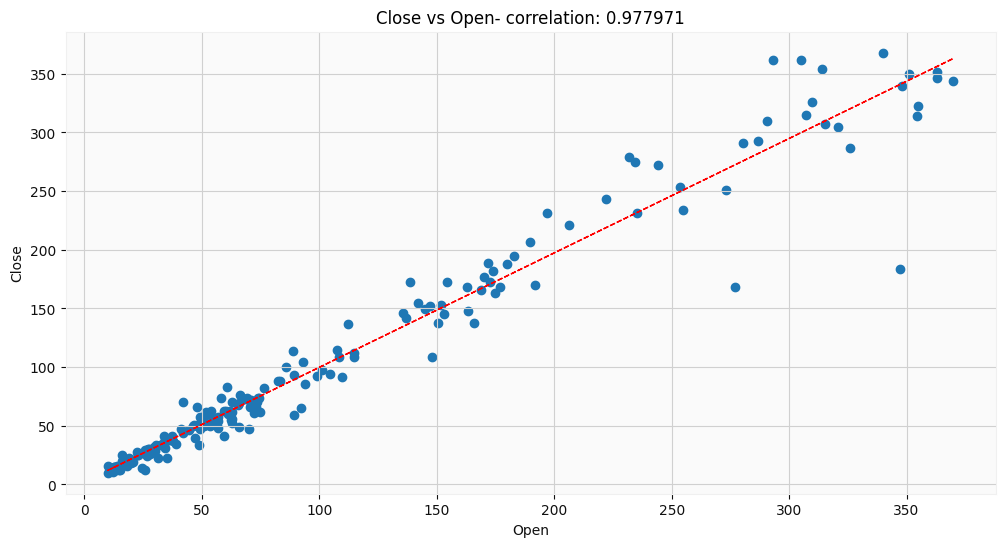

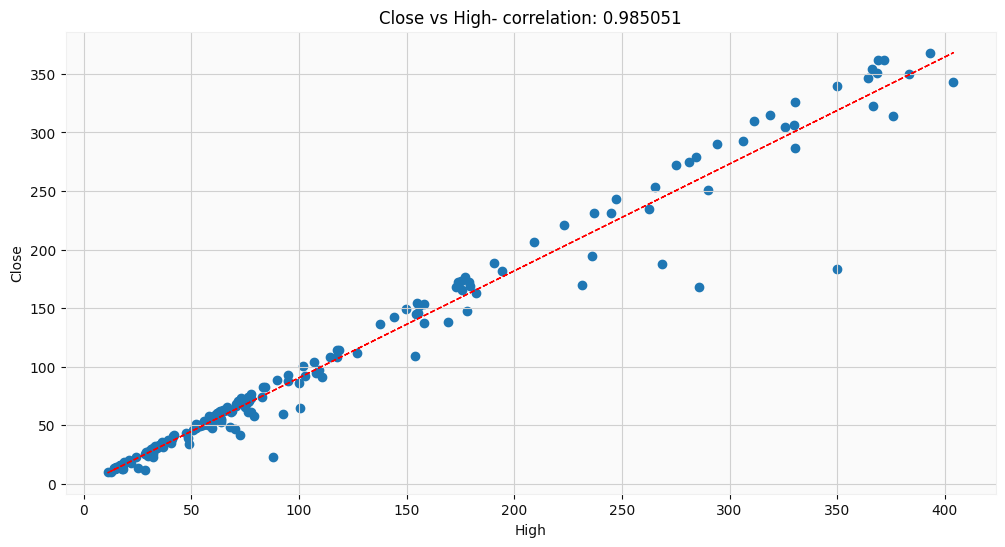

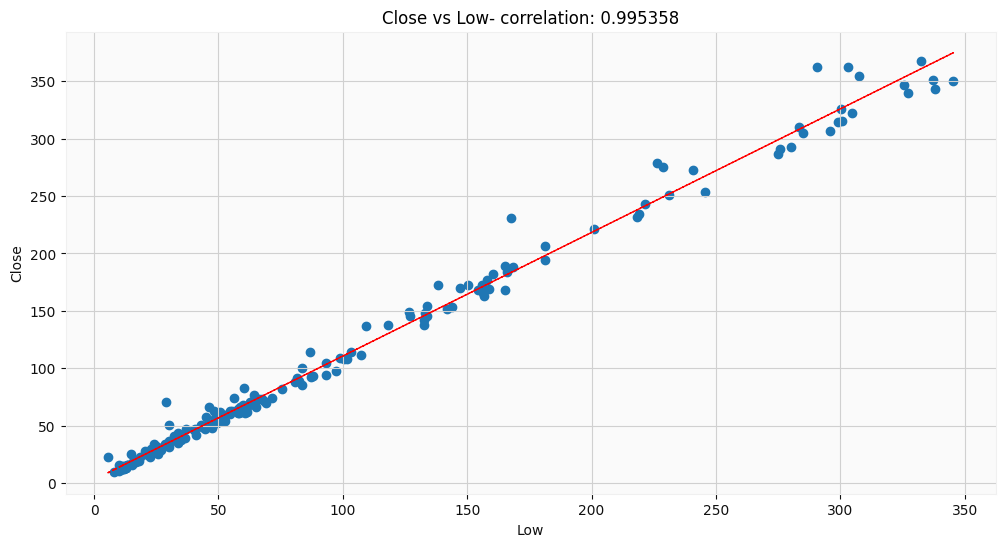

In [39]:
# Chart - 8 visualization code
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = dataset_copy[col]
  label = dataset_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(dataset_copy[col], dataset_copy['Close'], 1)
  y_ = np.poly1d(z)(dataset_copy[col])

  plt.plot(dataset_copy[col], y_, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

I want to plot correlation between independent variable and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9

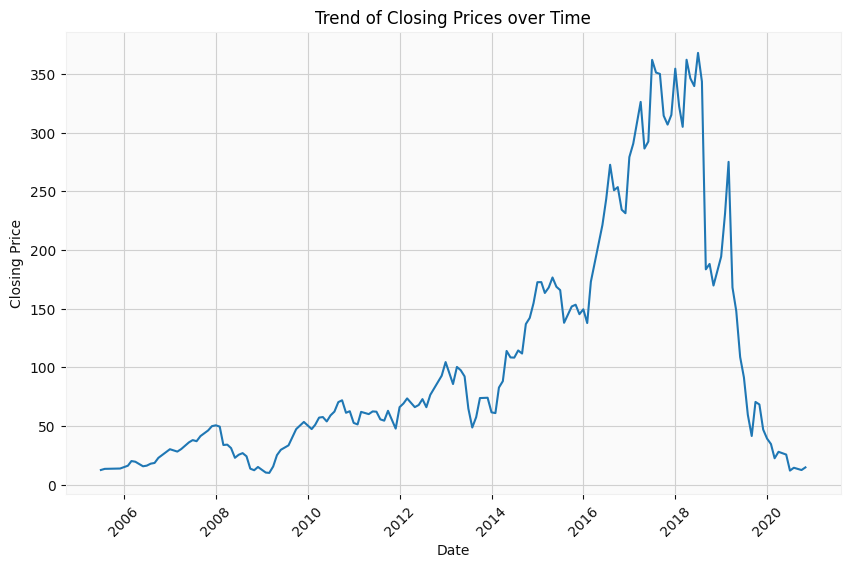

In [40]:
# Chart - 9 visualization code
# Extract the date and closing price columns from the dataset
dates = dataset_copy.index
closing_prices = dataset_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: >

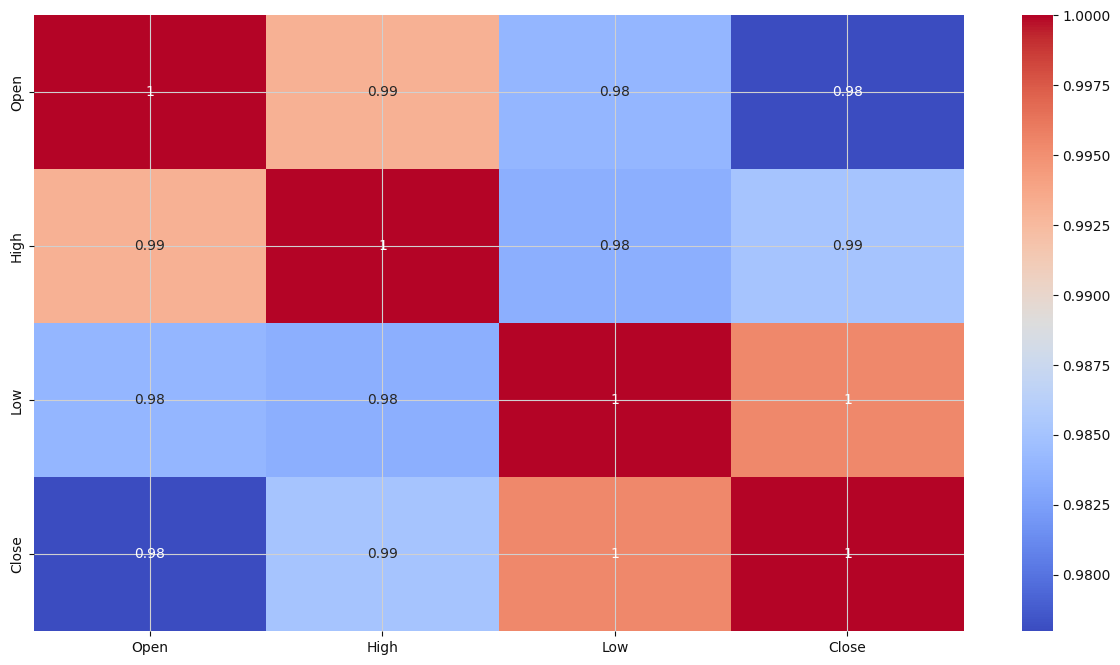

In [41]:
# Chart - 10 visualization code
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

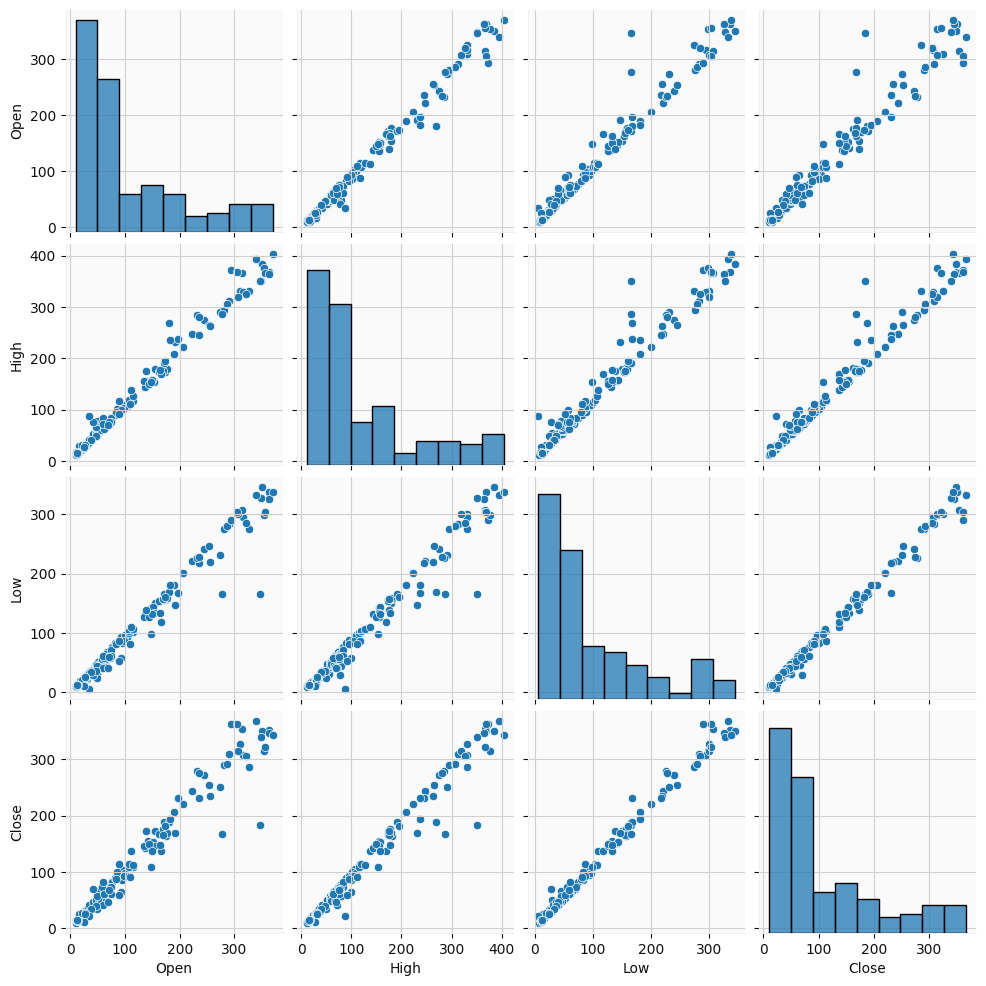

In [42]:
# Chart - 11 visualization code
# Pair Plot visualization code
sns.pairplot(dataset_copy)

In [43]:
dataset_copy

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [44]:
ds1=dataset_copy.copy()

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [45]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [46]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [47]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [48]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement1: There is a significant difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

Statement2: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [49]:

# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Z test, as i my data has more than 30 records.



##### Why did you choose the specific statistical test?

my dataset has more than 30 records, and i can calculate mean and sd from it.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices. Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices..

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Calculate the mean opening and closing prices for each month
ds1['Month'] = ds1.index.strftime('%Y-%m')
monthly_data = ds1.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")




Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [51]:
from scipy import stats

# Divide the data into groups based on opening prices
high_opening_prices = ds1[ds1['Open'] > threshold]['Close']
low_opening_prices = ds1[ds1['Open'] <= threshold]['Close']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


Reject the null hypothesis. There is a significant difference in the mean closing prices.


##### Which statistical test have you done to obtain P-Value?

t test and z test.

##### Why did you choose the specific statistical test?

as my data is sample data and not normally distrubuted. there is skewenss involved.Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation
#There are no missing values in the dataset.

dataset_copy.isnull().sum()

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments

#Transformation has taken care of outliers, so no need to treat outliers.

### 3. Categorical Encoding

In [55]:

# Encode your categorical columns
#There are no categorical variables in this dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [56]:
# Expand Contraction

#### 2. Lower Casing

In [57]:
# Lower Casing

#### 3. Removing Punctuations

In [58]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [59]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [60]:
# Remove Stopwords

In [61]:
# Remove White spaces

#### 6. Rephrase Text

In [62]:
# Rephrase Text

#### 7. Tokenization

In [63]:
# Tokenization

#### 8. Text Normalization

In [64]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [65]:
# POS Taging

#### 10. Text Vectorization

In [66]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [84]:

# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


dataset_copy['Mean_OHL'] = dataset_copy[['Open', 'High', 'Low']].mean(axis=1)
dataset_copy.head()



,Open,High,Low,Close,Mean_OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000
2005-08-01,12.58,14.88,12.55,13.42,13.336667
2005-09-01,13.48,14.87,12.27,13.30,13.540000
2005-10-01,13.20,14.47,12.40,12.99,13.356667
2005-11-01,13.35,13.88,12.88,13.41,13.370000


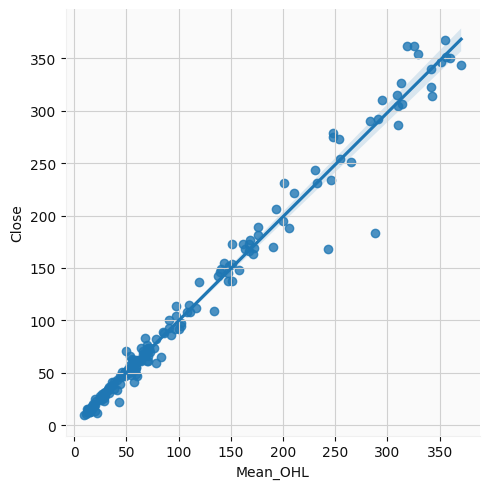

In [85]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_OHL', y='Close', fit_reg=True, data=dataset_copy)

<Axes: xlabel='Mean_OHL', ylabel='Density'>

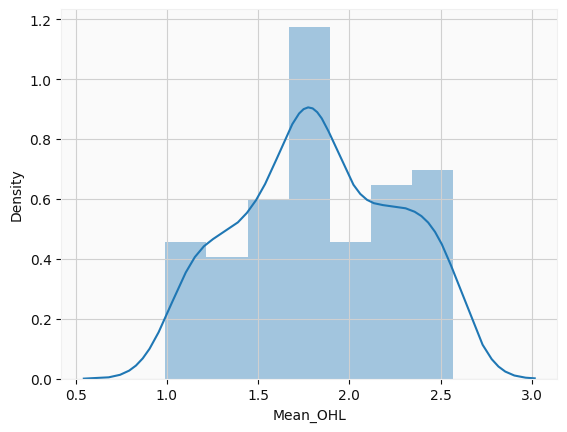

In [86]:
x=np.log10(dataset_copy['Mean_OHL'])
sns.distplot(x)

In [87]:
# use lags as additional features
for i in range(1, 13):
    dataset_copy["lag_{}".format(i)] = dataset_copy.Mean_OHL.shift(i)

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


#def calc_vif2(X):

    # Calculating VIF
    #vif = pd.DataFrame()
    #vif["variables"] = X.columns
    #vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #return(vif)

#calc_vif2(dataset_copy[[i for i in dataset_copy.describe().columns if i not in ['Close']]])

Now, I am using only Mean_OHL column and lag values, which will take the previous month OHL value. It will be useful to cover underlying patterns in this kind of problem.

In [88]:
dataset_copy.head()

,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.356667,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.370000,13.356667,13.540000,13.336667,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [89]:
#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = dataset_copy.dropna().Close.values
x_independ = dataset_copy.dropna().drop(['Close','Open','High','Low'], axis=1)


In [90]:
dependent_variable

['Close']

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Open,High, close. I think they must be included because, on opening price is high and when low, there is a significant change in closing price.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,independent variables and dependent variables have skeweness. I have used log transformation as the skewness is small

In [91]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
2006-07-01,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667,12.750000
2006-08-01,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667
2006-09-01,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000
2006-10-01,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667
2006-11-01,24.223333,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000


In [92]:
# Transform Your data
x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values


array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

In [93]:
#without transformation
#X_not =

# Create the dependent variable data
#Y_not = np.log10(y_depend)


### 6. Data Scaling

In [94]:
# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)


In [ ]:
#without transformation
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I am going to use standard scaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As I have only few features, dimensionality reduction is not necessary

Price Range: Instead of using Open, High, and Low separately, you can calculate the price range as the difference between the High and Low prices. This variable represents the volatility or fluctuation in the stock price for each period and can provide additional information to the model.

Average Price: Another approach is to calculate the average price as the average of the Open, High, and Low prices. This variable represents the overall price level for each period and can be useful in capturing the general trend or level of the stock price.

In [71]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
#splitting the data into a train and a test set. we do this using train test split.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


In [96]:
y_train

array([1.7895102 , 1.86934908, 2.46323583, 2.31468865, 1.7707784 ,
       1.72090317, 1.79504537, 2.27584094, 1.67495295, 1.79225157,
       1.70731463, 2.00121433, 1.18892848, 1.70363524, 1.77865763,
       2.36973522, 2.0187421 , 1.42894429, 1.57898284, 1.86770313,
       1.91750551, 1.08849047, 1.61752453, 2.55866058, 1.81947813,
       2.38639194, 1.69731654, 1.77451697, 2.05648559, 2.0581602 ,
       1.56808433, 2.21942733, 1.75663611, 1.78497371, 1.50419892,
       2.54955498, 1.6716356 , 2.48685536, 1.11892575, 2.36410052,
       1.53224464, 2.45694268, 1.2662317 , 1.81967552, 2.53096768,
       1.47943134, 1.81130684, 1.20844136, 1.07736791, 1.96773513,
       1.67870043, 1.7100327 , 2.22530928, 2.13618133, 1.76019623,
       1.7363965 , 1.88332068, 2.2884728 , 2.16205634, 2.23782011,
       2.39941411, 2.22685757, 1.52517443, 1.40001964, 0.99913054,
       2.36398783, 1.61267792, 1.96473092, 1.53844805, 1.16643011,
       1.13289977, 2.15253295, 1.3588862 , 2.23691496, 1.83972

##### What data splitting ratio have you used and why?

I have used 80 percent of the data for training the model and 20 % for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.


I do not think the data is imbalanced.

In [73]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

We are implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [97]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)


In [98]:
reg_with_transformation.score(x_train,y_train)


0.9843542232370774

In [99]:
# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)


In [100]:
comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713037
1,149.38,142.253914
2,49.42,50.536952
3,70.07,73.128303
4,62.54,61.988609


In [101]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)





Mean Absolute Error : 7.9796697876427505
MSE : 165.74457190566207
RMSE : 12.874182378142002
R2 : 0.9842311259574534
Adjusted R2: 0.9825779375497671


Mean Absolute Error : 7.6296835736156705
MSE : 247.3983988590329
RMSE : 15.72890329485921
R2 : 0.9627196081420266
Adjusted R2: 0.939641270325186


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

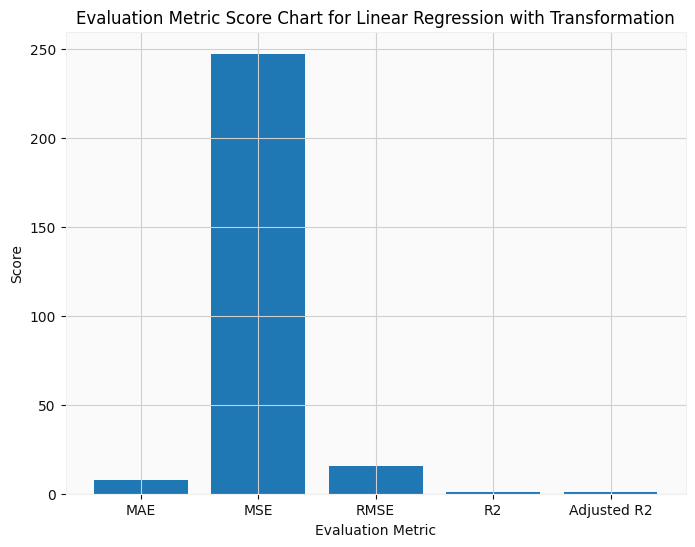

In [102]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title(
    'Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()

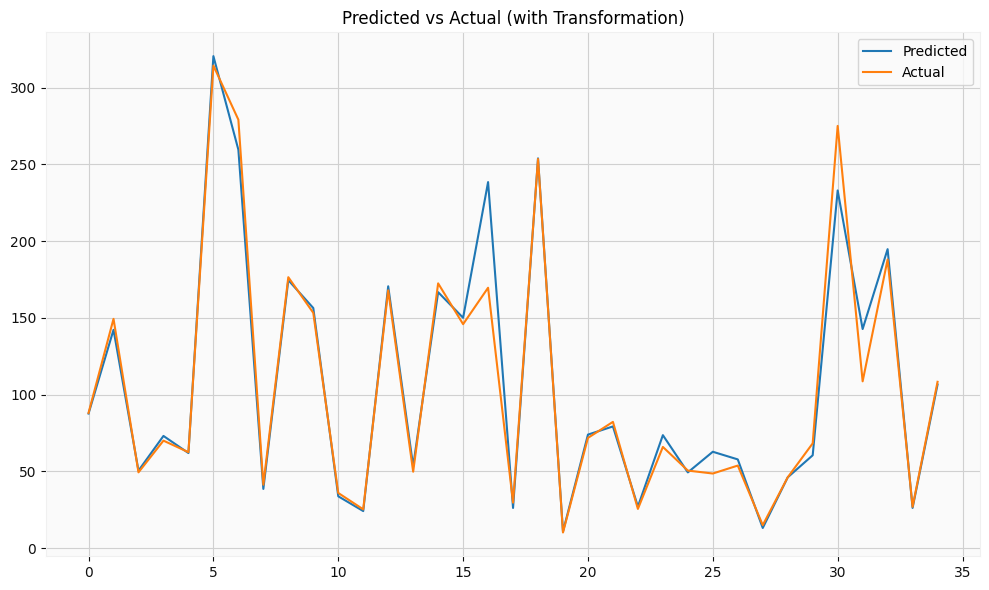

In [103]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

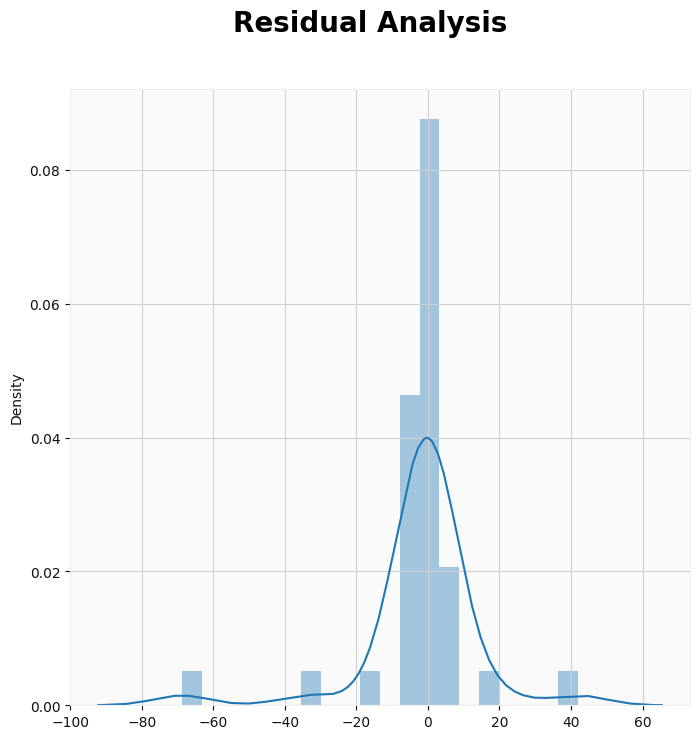

In [104]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

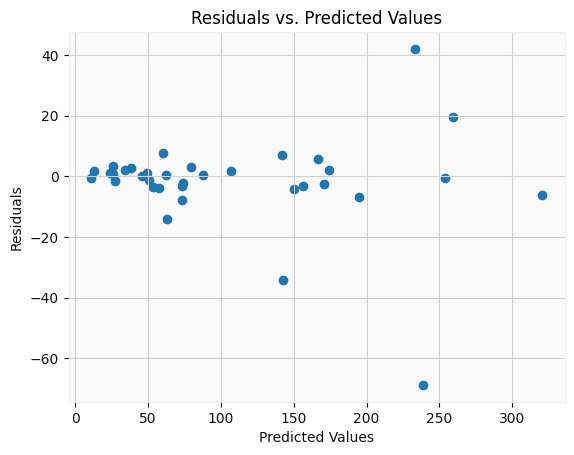

In [105]:
residuals = 10**(y_test)-10**(y_test_pred_with_transformation)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_with_transformation),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [106]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics


,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979670
1,Train Mean squared Error,165.744572
2,Train Root Mean squared Error,12.874182
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.629684
6,Mean squared Error,247.398399
7,Root Mean squared Error,15.728903
8,R2 score,0.962720
9,Adjusted R2 score,0.939641


The Root Mean Squared Error (RMSE) is slightly higher on the test set (15.728903) compared to the training set (12.874182), indicating a slightly larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is slightly lower on the test set (0.962720) compared to the training set (0.984231), suggesting that the model explains a slightly lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set (0.939641) compared to the training set (0.982578), accounting for the complexity of the model and the number of independent variables.

Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)



In [108]:

# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 8.18581124874956
MSE : 222.49884509562526
RMSE : 14.916395177643466
R2 : 0.9788315465020357
Adjusted R2: 0.9766122731514427


Mean Absolute Error : 7.184358051477427
MSE : 128.3864513051523
RMSE : 11.3307745236216
R2 : 0.9806534834664071
Adjusted R2: 0.968677068469421


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows good performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

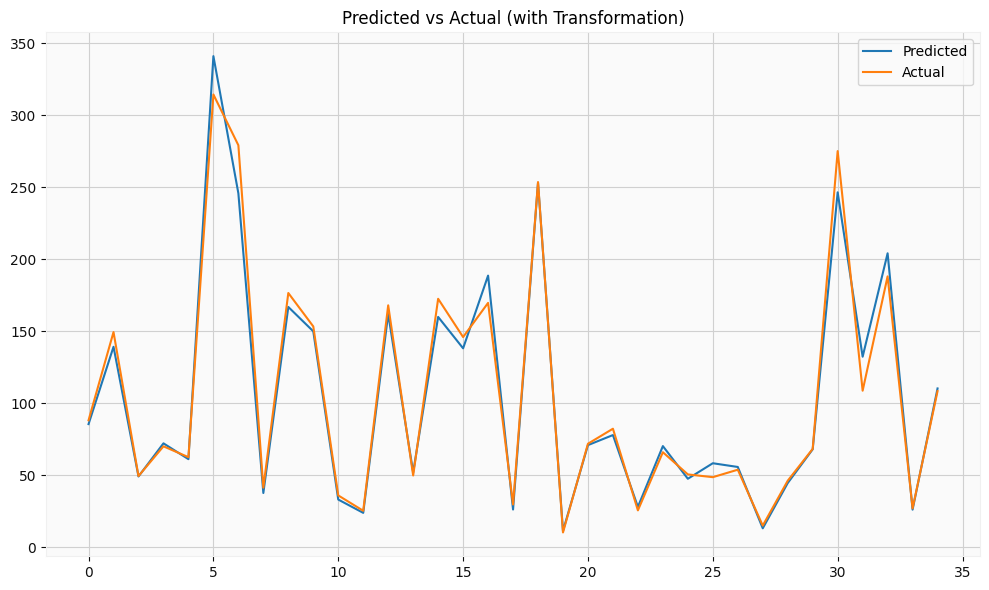

In [109]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

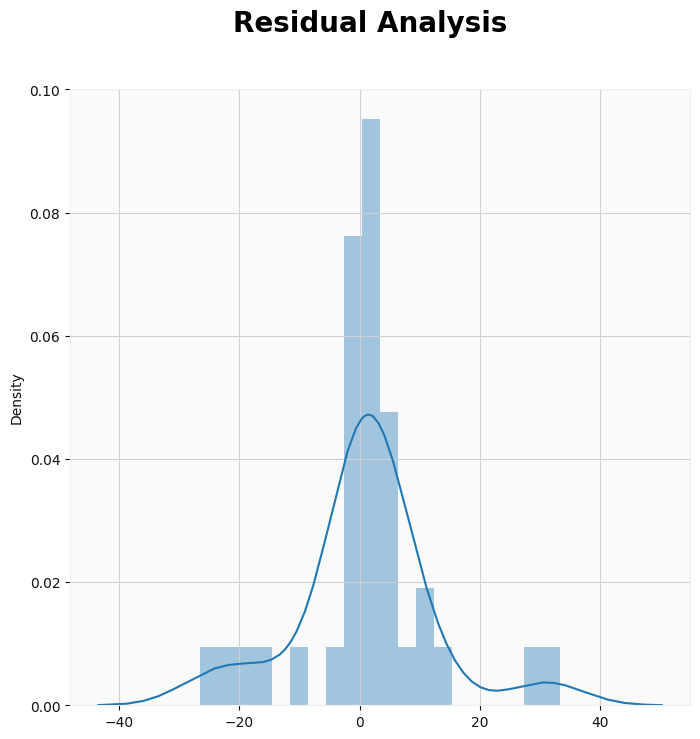

In [110]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

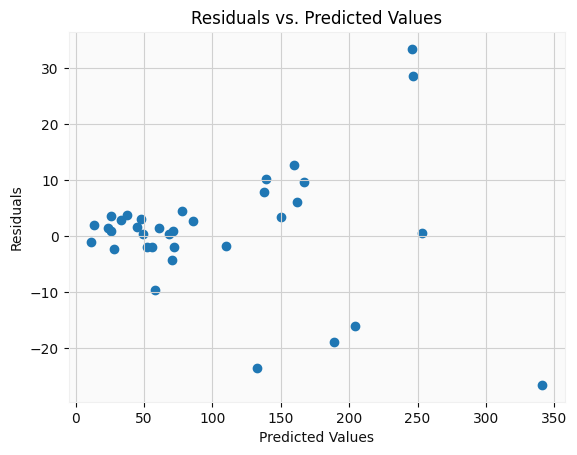

In [111]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [112]:
np.mean(residuals)

0.8712340760106433

All the assumptions of Linear Regression is being taken care. Mean of Residuals is nearly zero, and there is no hetroscadasticity.

In [113]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs,MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [114]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979670,8.185811
1,Train Mean squared Error,165.744572,222.498845
2,Train Root Mean squared Error,12.874182,14.916395
3,Train R2 score,0.984231,0.978832
4,Train Adjusted R2 score,0.982578,0.976612
5,Mean Absolute Error,7.629684,7.184358
6,Mean squared Error,247.398399,128.386451
7,Root Mean squared Error,15.728903,11.330775
8,R2 score,0.962720,0.980653
9,Adjusted R2 score,0.939641,0.968677


Model has improved in terms of predicting the unseen data as the MAE,RMSE are lower than simple regression model and R2 and adjusted R2 has increased after cross validation and hyper parameter tuning. However, seeing the adjustedr2, it is possible that model is overfitting and I will try to regularize with r2 regressor.

Ridge Regression (L2 Regularization):
Ridge adds a penalty term to the loss function that shrinks the coefficients towards zero without eliminating them completely.

It can be useful when dealing with multicollinearity, as it reduces the impact of highly correlated features.

Ridge is generally more suitable when all the features are expected to contribute to the model and no feature selection is desired.

I am using this because, I do not want to eliminate my features by using L1 or Elasticnet, as I included Lag values to identify the past trends to predict more accurately.




###RIDGE with Cross Validation and Hyper parameter tuning

In [115]:
#Ridge Regularization
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='r2', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')

In [116]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  r2 score is:  0.9760390512790227


In [117]:
print(ridge_regressor)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')


In [118]:
best_ridge_model1 = ridge_regressor.best_estimator_

print(best_ridge_model1.coef_)
print(best_ridge_model1.intercept_)

[ 0.39515104 -0.01483846  0.00717508  0.0200902  -0.01428747 -0.00189978
  0.06516592 -0.01046888 -0.05517151  0.03438031  0.04428562 -0.05331164
 -0.02728311]
1.8740878481194465


In [119]:
y_train_pred_ridge = ridge_regressor.predict(x_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)


In [120]:
ridge_regressor.score(x_train,y_train)

0.9835228344455276

In [121]:
# Metric Score for train set
train_MAE_ridge = mean_absolute_error(10**(y_train),(10**y_train_pred_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,train_r2_ridge)

train_adjusted_r2_ridge=1-(1-r2_score(10**(y_train), 10**(y_train_pred_ridge)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge)

print('\n')

# Metric Score for test set
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_test_pred_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge)

Mean Absolute Error : 7.822373428096926
MSE : 165.54855820067542
RMSE : 12.866567459920125
R2 : 0.9842497746250328
Adjusted R2: 0.9825985413195927


Mean Absolute Error : 7.051582916386262
MSE : 173.26818724315163
RMSE : 13.163137439195552
R2 : 0.9738902678968994
Adjusted R2: 0.9577271004045037


MAE has been reduced in test dataset which indicates model is predicting good on unseen data. RMSE is also similar in both cases.

In both cases, the R2 values are relatively high, indicating a good fit of the model to the data. The adjusted R2 values are slightly lower, suggesting that the inclusion of additional independent variables may not contribute significantly to the model's predictive power.

Overall, the model shows good performance on both the train and test datasets, with relatively low errors and high R2 values.

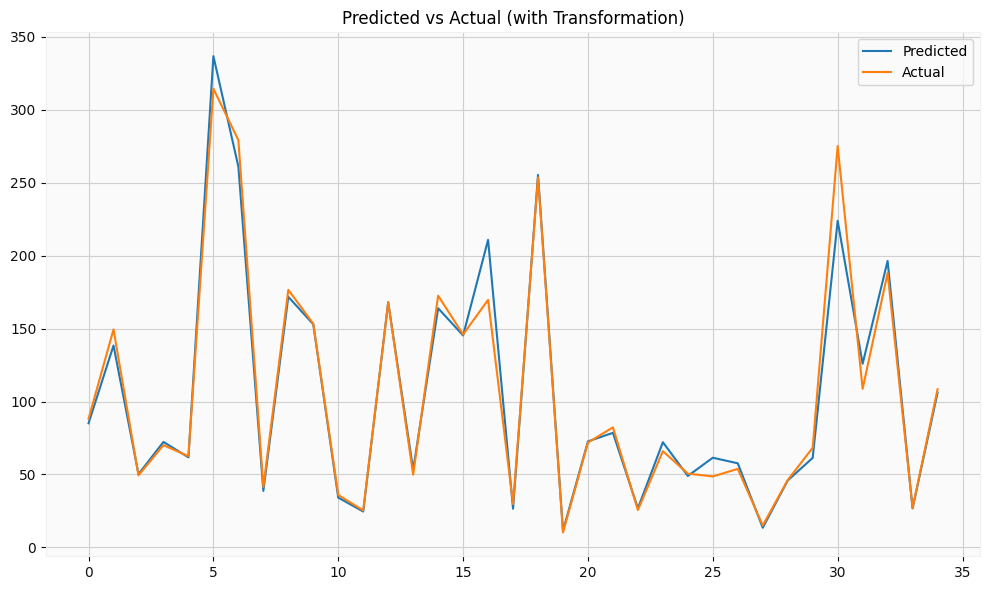

In [122]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_test_pred_ridge))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

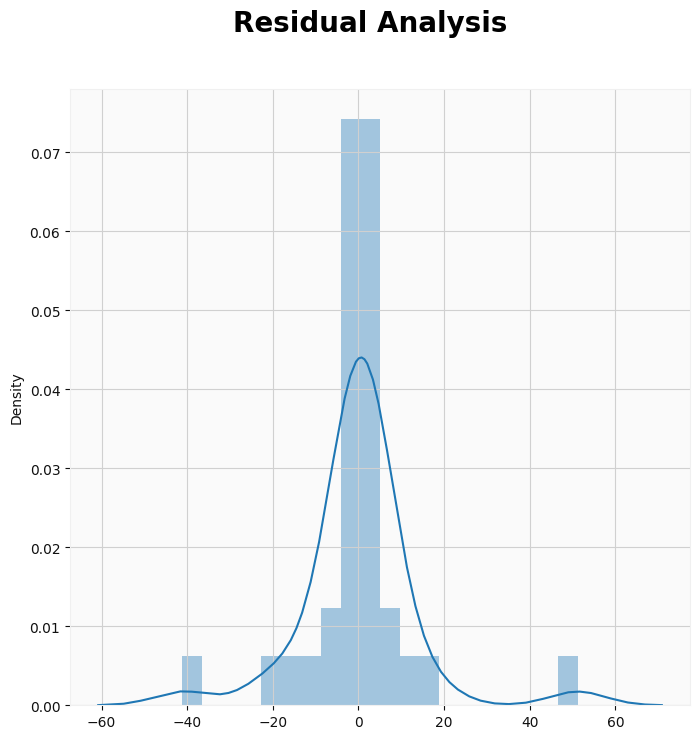

In [123]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

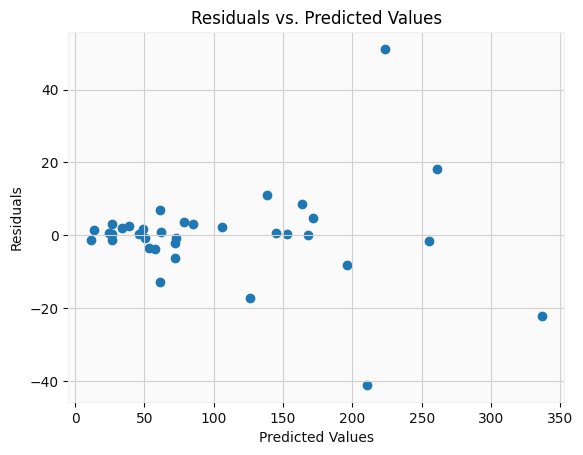

In [124]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_test_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [125]:
metrics['ridge_regressor'] = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge, train_adjusted_r2_ridge,MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]


In [126]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor
0,Train Mean Absolute Error,7.979670,8.185811,7.822373
1,Train Mean squared Error,165.744572,222.498845,165.548558
2,Train Root Mean squared Error,12.874182,14.916395,12.866567
3,Train R2 score,0.984231,0.978832,0.984250
4,Train Adjusted R2 score,0.982578,0.976612,0.982599
5,Mean Absolute Error,7.629684,7.184358,7.051583
6,Mean squared Error,247.398399,128.386451,173.268187
7,Root Mean squared Error,15.728903,11.330775,13.163137
8,R2 score,0.962720,0.980653,0.973890
9,Adjusted R2 score,0.939641,0.968677,0.957727


Model has improved compared to previous models, as it is producing leat MAE, and also handling overfitting problem which we faced with second problem. So, I am considering the ridge_regressor as my best model among three.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [83]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***